# Laboratorio 04: Interpolación.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Jesús Armando Cañas Gamboa
*Métodos computacionales 2025-I*

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d
from scipy.interpolate import CubicHermiteSpline
import sympy as sp


In [6]:
#Metodo de Newton
def diferencia_dividida(x, y, i, j):
    '''
    Calcula recursivamente la diferencia dividida f[x_i, x_{i+1}, ..., x_j]
    Entradas:
      x: array de puntos x
      y: array de puntos y
      i: indice del primer punto
      j: indice del ultimo punto
    Salidas:
      a: coeficiente diferencia dividida (i,j)
    '''
    if i == j:
        return y[i]
    else:
        num = diferencia_dividida(x, y, i + 1, j) - diferencia_dividida(x, y, i, j - 1)
        den = x[j] - x[i]
        return num / den

def coeficientes_a(x, y):
    '''
    Calcula los coeficientes a_i del polinomio de Newton.
    Entradas:
      x: array de puntos x
      y: array de puntos y
    Salidas:
      coeficientes: array de coeficientes a_i
    '''
    n = len(x)
    coeficientes = np.zeros_like(x, dtype=float)
    for i in range(n):
        coeficientes[i] = diferencia_dividida(x, y, 0, i)
    return coeficientes

def Polinomio_Newton(x, y):
  '''Calcula el polinomio de Newton a partir de los puntos (x, y)
  Entradas:
    x: array de puntos x
    y: array de puntos y
  Salidas:
    P: polinomio de Newton como una función de x
  '''
  coef = coeficientes_a(x, y)
  def P(x_val):
    resultado = coef[0]
    producto = 1.0
    for i in range(1, len(x)):
      producto *= (x_val - x[i - 1])
      resultado += coef[i] * producto
    return resultado
  return P
     


# 1.

Un automóvil que viaja a lo largo de una carretera recta es cronometrado en varios puntos. Los datos de las observaciones se dan en la siguiente tabla, donde el tiempo está en segundos, la distancia en metros y la velocidad en metros por segundo.

```
tiempos = np.array([0, 3, 5, 8, 13]) # segundos
distancias = np.array([0, 225, 383, 623, 993]) # metros
velocidades = np.array([75, 77, 80, 74, 72]) # metros/segundo
```

- Usar un polinomio de Hermite y de Splines Cúbicos para predecir la posición del automóvil y su velocidad cuando $t=10$ s.
- ¿Cuál es la velocidad máxima predicha para el automóvil en cada caso?

In [2]:
tiempos = np.array([0, 3, 5, 8, 13]) # segundos
distancias = np.array([0, 225, 383, 623, 993]) # metros
velocidades = np.array([75, 77, 80, 74, 72]) # metros/segundo

#Calculamos los polinomios de Hermite y Spline cubicos para distancia y velocidad
#posicion
Pol_Hermite_d = CubicHermiteSpline(tiempos, distancias, velocidades) #dy/dx son las velocidades en cada t
Pol_Splinecubic_d = CubicSpline(tiempos, distancias)

#Velocidad
Pol_Splinecubic_v = CubicSpline(tiempos, velocidades)

#Usando scipy calculamos la derivada de la velocidad del polinomio de cubic spline, para calcular el polinomio de Hermite
aceleracion = Pol_Splinecubic_v.derivative()
Pol_Hermite_v = CubicHermiteSpline(tiempos, velocidades, aceleracion(tiempos))


In [3]:
print(f'La distancia usando Hermite en t = 10 s es {Pol_Hermite_d(10):.2f} m')
print(f'La distancia usando Cubicspline en t = 10 s es {Pol_Splinecubic_d(10):.2f} m')
print(f'La velocidad usando Hermite en t = 10 s es {Pol_Hermite_v(10):.2f} m/s')
print(f'La velocidad usando Cubicspline en t = 10 s es {Pol_Splinecubic_v(10):.2f} m/s')

La distancia usando Hermite en t = 10 s es 771.96 m
La distancia usando Cubicspline en t = 10 s es 778.42 m
La velocidad usando Hermite en t = 10 s es 68.62 m/s
La velocidad usando Cubicspline en t = 10 s es 68.62 m/s


- ¿Cuál es la velocidad máxima predicha para el automóvil en cada caso?

In [6]:
t = np.linspace(min(tiempos), max(tiempos),10000)
print(max(Pol_Splinecubic_v(t)))

80.00281224093033


# 2.
Los valores de la aceleración gravitacional $g$ dependen de la altitud $y$ según se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar el valor de la aceleración gravitacional a las altitudes de 5,000 m, 42,000 m y 90,000 m. Grafique la distribución de la función de interpolación obtenida junto con los datos dados.

```
y = [0, 20000, 40000, 60000, 80000]  # en metros
g = [9.8100, 9.7487, 9.6879, 9.6278, 9.5682]  # en m/s²
```

In [7]:
y = [0, 20000, 40000, 60000, 80000]  # en metros
g = [9.8100, 9.7487, 9.6879, 9.6278, 9.5682]  # en m/s²

#Calculamos el polinomoi de interpolación de Newton
Pol_Newton = Polinomio_Newton(y,g)
#Hacemos un array con los puntos dados y uno para calcular cada gravedad
alturas = np.array([5000, 42000, 90000])
#Valores de la gravedad con el polinomio de Newton
gravedades = Pol_Newton(alturas)

#Calculamos la gravedad para cada altura interpolando con Newton
for altura in alturas:
    gravedad = Pol_Newton(altura)
    #Imprimimos
    print(f'Gravedad para h = {altura} : {gravedad:.2f}')


#Hacemos un array para almacenar los valores del polinomio de Newton 
#Y uno con los valors que vamos a interpolar
y_interp = np.linspace(0,80000,100000)
g_interp = Pol_Newton(y_interp)


Gravedad para h = 5000 : 9.79
Gravedad para h = 42000 : 9.68
Gravedad para h = 90000 : 9.54


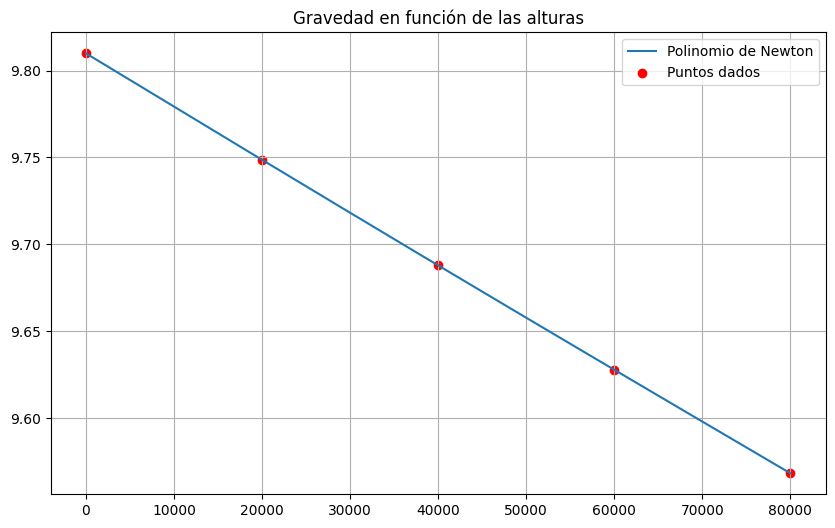

In [8]:
#GRaficamos todo
plt.figure(figsize = (10,6))
plt.title('Gravedad en función de las alturas')
plt.plot(y_interp,g_interp, label = 'Polinomio de Newton')
plt.scatter(y, g , label = 'Puntos dados', color = 'red')
plt.grid()
plt.legend()
plt.show()

# 3.
La densidad del aire $\rho$ depende de la temperatura $T$ como se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar los valores de la densidad del aire a 250 K, 800 K y 3,000 K. Luego, determine la densidad del aire a temperaturas desde 100 K hasta 2,500 K en intervalos de 10 K. Grafique la distribución de la densidad del aire calculada en función de la temperatura.

```
T = np.array([100, 200, 300, 500, 700, 1000, 1500, 2000, 2500]) # en K
rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394]) # en kg/m^3
```



In [11]:
T = np.array([100, 200, 300, 500, 700, 1000, 1500, 2000, 2500]) # en K
rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394]) # en kg/m^3

Temperaturas = np.array([ 250, 800, 3000])
Pol_Newton = Polinomio_Newton(T, rho)

for Temperatura in Temperaturas:
    densidad = Pol_Newton(Temperatura)
    print(f'la densidad del aire para la temperatura {Temperatura} es {densidad:.2f}')

la densidad del aire para la temperatura 250 es 1.40
la densidad del aire para la temperatura 800 es 0.50
la densidad del aire para la temperatura 3000 es 1561.17


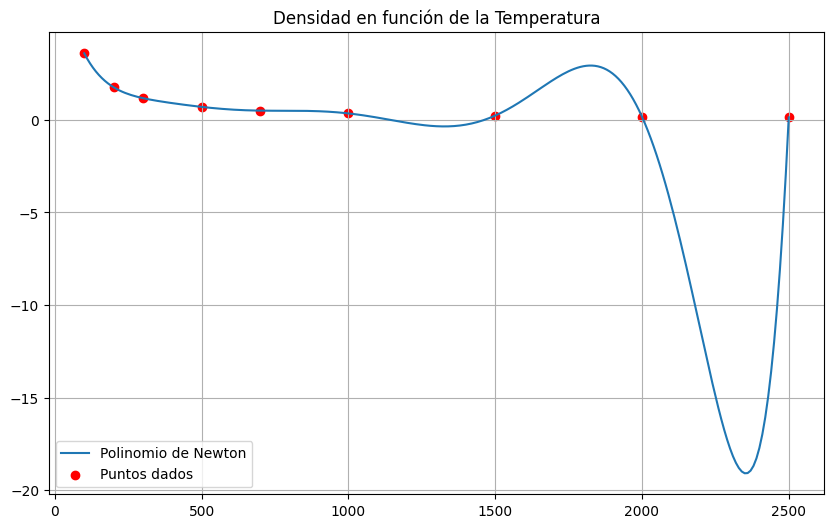

In [16]:
#Puntos de interpolación
d = 10
T_interp = np.arange(100, 2500 + d, d)
densidad = Pol_Newton(T_interp)

#GRaficamos todo
plt.figure(figsize = (10,6))
plt.title('Densidad en función de la Temperatura')
plt.plot(T_interp, densidad, label = 'Polinomio de Newton')
plt.scatter(T, rho , label = 'Puntos dados', color = 'red')
plt.grid()
plt.legend()
plt.show()

# 4.
Uno de los dispositivos más precisos para medir temperatura es el termómetro de resistencia de platino, también conocido como RTD. En este dispositivo, un alambre delgado y largo de platino se enrolla alrededor de un carrete y se encapsula en una cubierta de acero inoxidable. La resistencia del alambre cambia de manera muy lineal con la temperatura. Una longitud típica de alambre tiene una resistencia de aproximadamente 100 $\Omega$ a $0^{\circ}$ C y cambia alrededor de 0.39 $\Omega/^{\circ}$ C. Por lo tanto, para medir temperaturas con precisión, es necesario poder medir cambios en la resistencia con alta resolución. Tradicionalmente, se ha utilizado el circuito de puente desequilibrado para esto, como se ilustra en la figura, el cual proporciona un voltaje de salida pequeño que es proporcional (aunque no linealmente) a la resistencia del sensor.

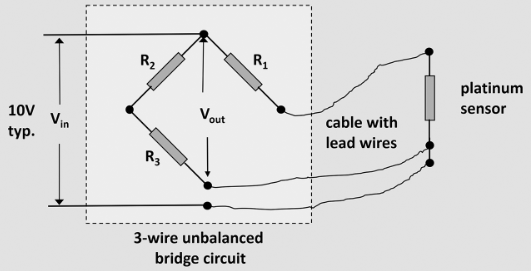




A continuación se presentan mediciones tomadas de dicho circuito, con $R_1 = R_2 = 5$ $k\Omega$ y $R_3 = 120$ $\Omega$:

```
resistencia = np.array([100, 115, 130, 145, 160, 175])  # Resistencia del sensor (Ohms)
voltaje = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])  # Salida del puente (V)
```

Un termómetro de resistencia de platino estándar de 100 $\Omega$ tiene una resistencia de 139.27 $\Omega$ a $100^\circ$ C. Utilice el método de interpolación que desee para estimar el voltaje de salida del puente en estas condiciones. Si la salida del puente se mide en 0 voltios, estime la resistencia medida. ¿Qué conclusión puede obtener?

In [17]:
resistencia = np.array([100, 115, 130, 145, 160, 175])  # Resistencia del sensor (Ohms)
voltaje = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])  # Salida del puente (V)

#Calculamos las resistencias con temperatura
R_T = lambda R : 39.27 + R #conversion para Resistencia con temperatura       
resistencia_T = R_T(resistencia)

#Calculamos el polinomio de interpolacion con CubicSpline
Voltaje_salida = CubicSpline(resistencia, voltaje)

#Caclulamos el voltaje de salida para cada resistencia y mostramos
print('Resistencia   Voltaje')
for resistencia in resistencia_T:
    Voltajes = Voltaje_salida(resistencia)
    print(f'{resistencia:.2f}       {Voltajes:.5f}')   

Resistencia   Voltaje
139.27       -0.37015
154.27       -0.62243
169.27       -0.84858
184.27       -1.05284
199.27       -1.23943
214.27       -1.41259


In [18]:
resistencia = np.array([100, 115, 130, 145, 160, 175])  # Resistencia del sensor (Ohms)
voltaje = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])  # Salida del puente (V)

# Ordenar por voltaje
indices_ordenados = np.argsort(voltaje)
voltaje_ordenado = voltaje[indices_ordenados]
resistencia_ordenada = resistencia[indices_ordenados]

# Interpolación
Resistencia_spline = CubicSpline(voltaje_ordenado, resistencia_ordenada)

print(f'La resistencia cuando el voltaje 0 es {Resistencia_spline(0):.2f}')

La resistencia cuando el voltaje 0 es 120.00


Como la relación es decreciente quiere decir que de 120 ohmios en adelante el voltaje es cero

# 5.
El índice de refracción del vidrio de borosilicato a diferentes longitudes de onda se presenta en la siguiente tabla. Estime la longitud de onda donde el índice de refracción es 1.520.

```
lambda_angstrom = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])  # en Å
indice_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])
```

In [19]:
lambda_angstrom = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])  # en Å
indice_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])

Pol_Cubicspline_indice = CubicSpline(indice_refraccion, lambda_angstrom)

print(f'La longitud de onda (Angstroms) donde el índice de refracción es 1.520 es {Pol_Cubicspline_indice(1.520):.0f}')

La longitud de onda (Angstroms) donde el índice de refracción es 1.520 es 4482
